# Most Streamed Spotify Songs of 2023

Author: Mo Zhou

Course Project, UC Irvine, Math 10, Summer 2023

## Introduction

This project delves deep into the "Most Streamed Spotify Songs of 2023" dataset to unearth patterns and preferences of music enthusiasts globally. Initial explorations focused on descriptive statistics, revealing the central tendencies of various song attributes like danceability, energy, and valence. Through data visualization techniques, correlations between these features and streaming numbers were visualized, offering a visual narrative of what possibly makes a song resonate with audiences. Lastly, I attempting to decipher the formula behind a chart-topping hit via machine learning predictions.

## Data Cleaning and Feature Engineering


In [1]:
import pandas as pd
import altair as alt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("spotify23.csv")
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


The dataframe contains 952 artists, which is too many to analyze. Thus, we try to break down the dataframe and create a new dataframe called df_top_200 by sorting top 200 streamed tracks . In this way it will be easier to analyze the dataset and find the pattern of music.

In [3]:
df_top_200 = df.sort_values(by="streams", ascending=False).head(200)
df_top_200

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1,1970,1,1,2877,0,BPM110KeyAModeMajorDanceability53Valence75Ener...,16,...,110,A,Major,53,75,69,7,0,17,3
33,Anti-Hero,Taylor Swift,1,2022,10,21,9082,56,999748277,242,...,97,E,Major,64,51,63,12,0,19,5
625,Arcade,Duncan Laurence,1,2019,3,7,6646,0,991336132,107,...,72,A,Minor,45,27,33,82,0,14,4
253,Glimpse of Us,Joji,1,2022,6,10,6330,6,988515741,109,...,170,G#,Major,44,27,32,89,0,14,5
455,Seek & Destroy,SZA,1,2022,12,9,1007,0,98709329,5,...,152,C#,Major,65,35,65,44,18,21,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,Snow On The Beach (feat. More Lana Del Rey),"Lana Del Rey, Taylor Swift",2,2023,5,26,359,2,60350538,1,...,110,F#,Minor,66,32,40,81,0,11,3
125,Feliz Cumplea��os Fe,Feid,1,2022,8,19,3430,38,601863821,45,...,95,F,Major,87,57,55,10,0,29,7
81,Until I Found You (with Em Beihold) - Em Beiho...,"Em Beihold, Stephen Sanchez",2,2022,4,22,2790,30,600976848,60,...,101,A#,Major,34,32,57,78,0,20,3
545,Softcore,The Neighbourhood,1,2018,3,9,3947,12,599770206,33,...,94,D,Major,57,36,58,5,0,15,3


As we can see from the dataframe, column "in_shazam_charts" and "key" have missing values. In this case, this two type of values are not necessary for analysis, so we can just drop them.

In [4]:
del df_top_200["in_shazam_charts"]
del df_top_200["key"]

By using describe() feature, we can have a quick statistical summary of the dataframe. 

In [5]:
df_top_200.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.0000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,1.525000,2017.940000,5.37000,13.885000,4863.345000,12.330000,62.555000,55.510000,2.9350,122.735000,67.280000,50.125000,64.220000,27.165000,1.970000,18.120000,9.700000
std,0.708438,11.943603,3.50206,9.228086,6180.751959,18.415394,62.520244,51.292931,6.1457,28.812246,15.215425,23.111688,15.058399,25.868585,8.393531,12.582815,10.110942
min,1.000000,1930.000000,1.00000,1.000000,34.000000,0.000000,0.000000,0.000000,0.0000,71.000000,24.000000,4.000000,20.000000,0.000000,0.000000,5.000000,3.000000
25%,1.000000,2019.000000,3.00000,6.000000,856.000000,0.000000,11.750000,11.000000,0.0000,100.000000,57.750000,29.750000,55.000000,5.000000,0.000000,9.750000,4.000000
50%,1.000000,2022.000000,5.00000,13.000000,3193.500000,4.000000,37.000000,45.000000,0.0000,120.000000,70.000000,51.000000,66.000000,16.500000,0.000000,13.000000,5.000000
75%,2.000000,2022.000000,7.00000,22.000000,6921.500000,19.000000,98.000000,96.000000,2.0000,140.000000,79.000000,69.000000,74.500000,48.000000,0.000000,24.000000,10.000000
max,4.000000,2023.000000,12.00000,31.000000,52898.000000,100.000000,242.000000,222.000000,38.0000,206.000000,93.000000,96.000000,94.000000,91.000000,63.000000,72.000000,64.000000


Also, we can use mode() method to determines the value that appears most frequently in "feature" columns, which are danceability_%/valence_%/energy_%/acousticness_%/instrumentalness_%/liveness_%/speechiness_%

In [6]:
interests = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

df_mode_values = df_top_200[interests].mode().iloc[0]

df_mode = pd.DataFrame(df_mode_values).transpose()
df_mode

,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,56.0,53.0,74.0,0.0,0.0,11.0,4.0


In order to have a better idea about which artist has more influence in the chart, we can creat a popularity score based on the number of times an artist appears on the list.

In [7]:
df_top_200['artist_popularity'] = df_top_200['artist(s)_name'].map(df_top_200['artist(s)_name'].value_counts())

The popularity score, which represents how the number of times an artist appeared in the chart, can help us better understand artists' influences. Let's make a sub-dataframe based on popularity score. First creating a new DataFrame with unique artist names and their popularity scores. Then sorting df2 based on the artist popularity score in ascending order

In [8]:
df2 = df_top_200[['artist(s)_name', 'artist_popularity']].drop_duplicates(subset='artist(s)_name')
df2 = df2.sort_values(by='artist_popularity', ascending=False)
df2

,artist(s)_name,artist_popularity
33,Taylor Swift,9
455,SZA,7
523,The Weeknd,4
339,Morgan Wallen,3
588,Olivia Rodrigo,3
...,...,...
875,"Kanye West, Lil Durk, Cardi B",1
928,Lil Baby,1
600,M��ne,1
919,"Marshmello, Juice WRLD",1


As we see, Taylor Swift, SZA, and The Weeknd, they are the three most common appearances on the list, with Taylor appearing nine times, well ahead of the other two

Then, we can use Pandas grouping techniques to see which month has highest average monthly streams.

First, filtering out rows with non-numeric characters in the 'streams' column. And since the datatype of "streams" is object, we need to convert it to float to complete calculation. Then we can sort the average monthly streams value in a desceding order to acquire the month with highest streams

In [9]:
df_top_200['streams']
df_top_200 = df_top_200[df_top_200['streams'].str.isnumeric()]
df_top_200['streams'] = df_top_200['streams'].astype(float)
avg_streams_per_month = df_top_200.groupby('released_month')['streams'].mean()
top_month = avg_streams_per_month.sort_values(ascending=False).head(1)
top_month

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


released_month
8    700760442.5
Name: streams, dtype: float64

August has highest average monthly streams on Spotify, approximately 700760442.5 streams

## Data Visualization via Altair

Graphs and charts give the viewer a more direct sense of the distribution of data than numbers do.

First, let's make a scatter plot to understand the correlation between different features and streaming numbers using Altair

There are 7 features:  'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'. We try to analyze the correlation between each of them and streams

In [10]:
features = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

combined_chart = alt.Chart(df_top_200).mark_circle().encode(
    x=features[0],
    y='streams',
    tooltip=[features[0], 'streams']
).properties(
    title=f'Streams vs. {features[0]}'
)


for feature in features[1:]:
    chart = alt.Chart(df_top_200).mark_circle().encode(
        x=feature,
        y='streams',
        tooltip=[feature, 'streams']
    ).properties(
        title=f'Streams vs. {feature}'
    )
    combined_chart |= chart


combined_chart.display()


alt.HConcatChart(...)

With these scatter plots, viewers are be able to visually inspect the relationship between each feature and streaming numbers. If points align or group in a certain pattern, it can indicate some correlation. 

Other than scatter plots, histogram is also a great alternative to help us find songs pattern. We can also use it to visualize the distribution of streaming numbers over different BPM bins. This can give us insights into which BPM ranges are most popular in terms of streaming numbers.

In [11]:
chart = alt.Chart(df_top_200).mark_bar().encode(
    alt.X("bpm:Q", bin=True, title="BPM Bins"),
    y='count()',
    color='mean(streams):Q',
    tooltip=[alt.Tooltip('mean(streams):Q', title='Average Streams'), 'count()']
).properties(
    title="Histogram of BPM colored by Average Streaming Numbers"
)

chart.display()


alt.Chart(...)

Here, we use seaborn techniques to see which months are most popular for top streamed songs.

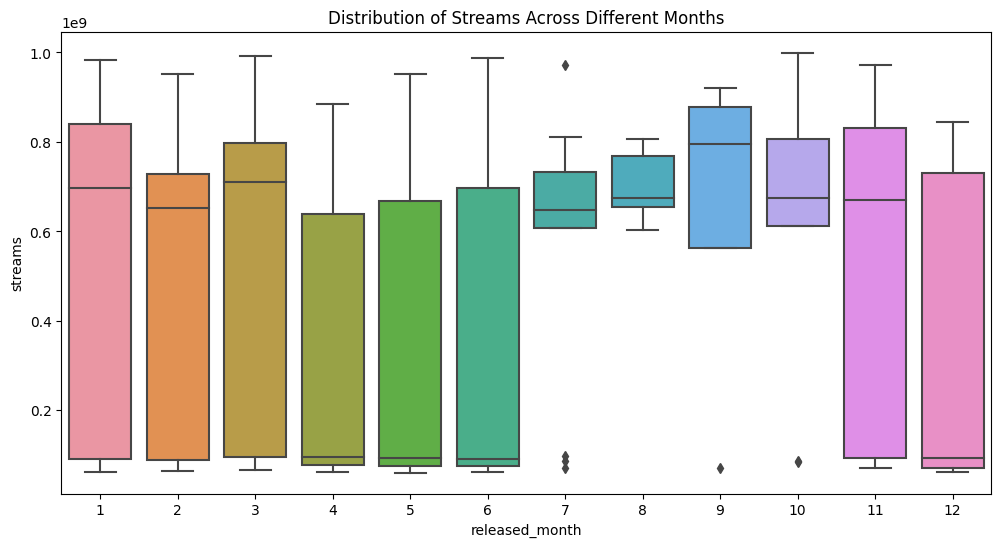

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top_200, x='released_month', y='streams')
plt.title('Distribution of Streams Across Different Months')
plt.show()

Given all the above charts and histograms, viewers can make their own conlusion abou relationship between song's features and streams.

## Predictive Modeling with scikit-learn

With the top 200 most streamed songs given above, we have found some interesting realtionship between stream numbers and songs' features. People usually use "hits" to evaluate whether a song is popular or not. Now, we can label each song is as "hits" or "non-hits" based on a threshold (In this case, songs with streams above the 75th percentile could be considered "hits").

First, transform the streams column into a binary classification problem. Songs above the 75th percentile in terms of streaming numbers were labeled as "hits"(1) and the rest as "non-hits"(0). This simplification allows us to use classification models. Add a new column 'hit'

In [13]:
threshold = df_top_200['streams'].quantile(0.75)
df_top_200['hit'] = (df_top_200['streams'] > threshold).astype(int)
X = df_top_200[features]
y = df_top_200['hit']

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Let's use a Random Forest Classifier. Using train_test_split, we split the dataset into 80% for training and 20% for testing. The random_state ensures reproducibility.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.75
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        28
           1       1.00      0.17      0.29        12

    accuracy                           0.75        40
   macro avg       0.87      0.58      0.57        40
weighted avg       0.82      0.75      0.68        40



Understanding which features influence the model's decisions can also give insights and potentially guide further data collection or feature engineering efforts.

We first extracted feature importance values from the trained random forest model. We then visualized these importances using a horizontal bar chart to make it easier to interpret and understand which features were the most influential in determining if a song is a hit.

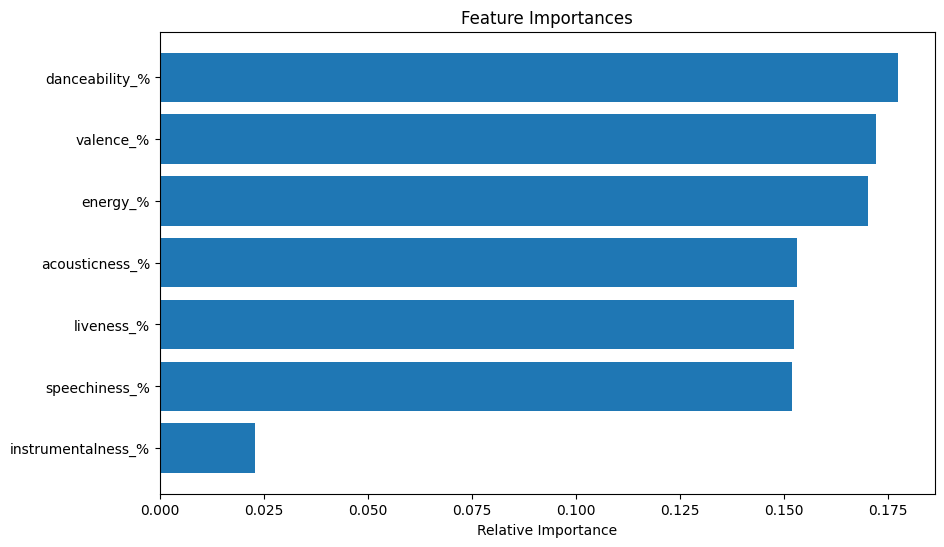

In [15]:
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Summary

This project primarily focusing on features like danceability, valence, and energy. The visualizations highlighted potential audience preferences, suggesting an inclination towards upbeat tracks in 2023. Monthly data segmentation revealed key periods of music consumption. Importantly, through a regression model, we attempted to predict song popularity based on quantifiable attributes.

## References


* What is the source of your dataset(s)?
https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023?resource=download

* List any other references that you found helpful.

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

https://altair-viz.github.io/user_guide/marks/boxplot.html

https://scikit-plot.readthedocs.io/en/stable/Quickstart.html

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c5a598c7-0aa1-4a78-bb9f-2f2977df39c3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>